# Predict Movie Success

### Why we think a movie is success when  $Gross Revenue > 2Budget$
A general rule of thumb for qualifying a movie as a “financial success” is to compare its gross revenue to twice its reported budget - in other words, an ROI of at least 1. In this case, the producers can largely pay back the cost of the movie production and make profits for the company.  

# Overview of the model used
- Logistic Regression
- Random Forest Regression
- Decision Tree Regression
- Gradient Boosting Machines Regression
- Artificial Neural Network
- Convolutional Neural Network

Accuracy, precision, recall, and f1-scores are essential metrics for evaluating classification models in this part. 

### Accuracy
- **Definition**: The proportion of correct predictions (both true positives and true negatives) out of the total predictions.
- **Usefulness**: It gives a general sense of how many predictions the model got right.

### Precision
- **Definition**: The ratio of true positive predictions to all positive predictions made by the model.
- **Usefulness**: It indicates how many of the predicted positives were actually correct. High precision is crucial when the cost of a false positive is high (e.g., in medical tests).

### Recall
- **Definition**: The ratio of true positive predictions to all actual positives in the data.
- **Usefulness**: It indicates how many of the actual positives the model correctly identified. High recall is important when missing true positives is costly (e.g., in fraud detection).

### F1-Score
- **Definition**: The harmonic mean of precision and recall, balancing both metrics.
- **Usefulness**: It provides a single score that balances precision and recall. This is valuable when there's a trade-off between the two.

In [10]:
!pip install tensorflow
!pip install scikit-learn

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

In [14]:
# Load the dataset
df = pd.read_csv('cleaned_movies_dataset.csv')

# Remove unnecessary columns
relevant_columns = ['rating', 'genre', 'votes', 'budget','company' ,'runtime',
                    'positive_sentiment', 'neutral_sentiment', 'negative_sentiment', 'success']
prepared_df = df[relevant_columns]

# One-hot encode categorical variables
ohe = OneHotEncoder(sparse_output=False, drop='first')
categorical_vars = ['rating', 'genre','company']
encoded_vars = ohe.fit_transform(prepared_df[categorical_vars])

# Convert to DataFrame and assign column names
encoded_df = pd.DataFrame(encoded_vars, columns=ohe.get_feature_names_out(categorical_vars))

# Replace categorical columns with encoded columns
final_df = pd.concat([prepared_df.drop(columns=categorical_vars), encoded_df], axis=1)

# Define the features (X) and the target (y)
X = final_df.drop(columns=['success'])
y = final_df['success']

# Create a standard scaler to rescale the data
scaler = StandardScaler()

# Apply scaling only to numeric columns
numeric_cols = ['votes', 'budget', 'runtime', 'positive_sentiment', 'neutral_sentiment', 'negative_sentiment']

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and transform the train set, and transform the test set
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

# Replace the original numeric columns with the scaled versions
X_train.loc[:, numeric_cols] = X_train_scaled
X_test.loc[:, numeric_cols] = X_test_scaled

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(611, 350) (263, 350) (611,) (263,)


# Model Compare and Analysis

### Logistic Regression
- **Accuracy**: 0.688
- **Precision and Recall**:
  - Class 0: Precision 0.65, Recall 0.65, F1-score 0.65
  - Class 1: Precision 0.72, Recall 0.72, F1-score 0.72
- **Overall**: Logistic Regression has a good balance of precision and recall across both classes, with a higher recall and precision for class 1. It achieves reasonable accuracy and balanced results.

### Random Forest Regression
- **Accuracy**: 0.665
- **Precision and Recall**:
  - Class 0: Precision 0.64, Recall 0.55, F1-score 0.59
  - Class 1: Precision 0.68, Recall 0.76, F1-score 0.72
- **Overall**: Random Forest shows a slightly lower accuracy and recall for class 0, with a higher recall for class 1. The variation in class 0 might suggest some issues with balanced performance.

### Decision Tree Regression
- **Accuracy**: 0.624
- **Precision and Recall**:
  - Class 0: Precision 0.59, Recall 0.49, F1-score 0.54
  - Class 1: Precision 0.64, Recall 0.73, F1-score 0.68
- **Overall**: Decision Tree has lower accuracy and recall for class 0, with reasonable precision and recall for class 1. This indicates a potential imbalance in its performance across classes, with class 0 having lower recall and precision.

### Gradient Boosting Machines Regression
- **Accuracy**: 0.681
- **Precision and Recall**:
  - Class 0: Precision 0.65, Recall 0.61, F1-score 0.63
  - Class 1: Precision 0.71, Recall 0.73, F1-score 0.72
- **Overall**: Gradient Boosting Machines (GBM) show strong results with higher accuracy and more balanced recall and precision across classes. This model seems to perform consistently across both classes.

### Artificial Neural Network
- **Accuracy**: 0.696
- **Precision and Recall**:
  - Class 0: Precision 0.66, Recall 0.64, F1-score 0.65
  - Class 1: Precision 0.72, Recall 0.74, F1-score 0.73
- **Overall**: ANN performs well with a high accuracy, balanced recall, and precision across both classes. It has one of the higher accuracies and strong performance metrics, indicating a good fit for the dataset.

### Convolutional Neural Network
- **Accuracy**: 0.597
- **Precision and Recall**:
  - Class 0: Precision 0.54, Recall 0.57, F1-score 0.55
  - Class 1: Precision 0.65, Recall 0.62, F1-score 0.63
- **Overall**: CNN has the lowest accuracy among the models, with lower precision and recall, particularly for class 0. It seems to struggle with balanced performance across both classes, indicating the need for tuning or model re-evaluation.

### Conclusion
The **Artificial Neural Network** and **Logistic Regression** demonstrate the best performance with higher accuracy and balanced precision and recall across both classes. **Gradient Boosting Machines** also perform well, with consistent results. **Random Forest Regression** shows a moderate performance but with some imbalance in recall for class 0. **Decision Tree Regression** and **Convolutional Neural Network** exhibit the lowest accuracy, indicating potential issues with model structure or hyperparameters. Further tuning and re-evaluation may be needed to improve their performance.

# Logistic Regression

In [27]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Train the model on the training set
log_reg_model.fit(X_train, y_train)

# Predict the test set
y_pred = log_reg_model.predict(X_test)

# Calculate the accuracy and generate the classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.688212927756654
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       116
           1       0.72      0.72      0.72       147

    accuracy                           0.69       263
   macro avg       0.68      0.68      0.68       263
weighted avg       0.69      0.69      0.69       263



### Confusion Matrix
A confusion matrix visualizes the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives.

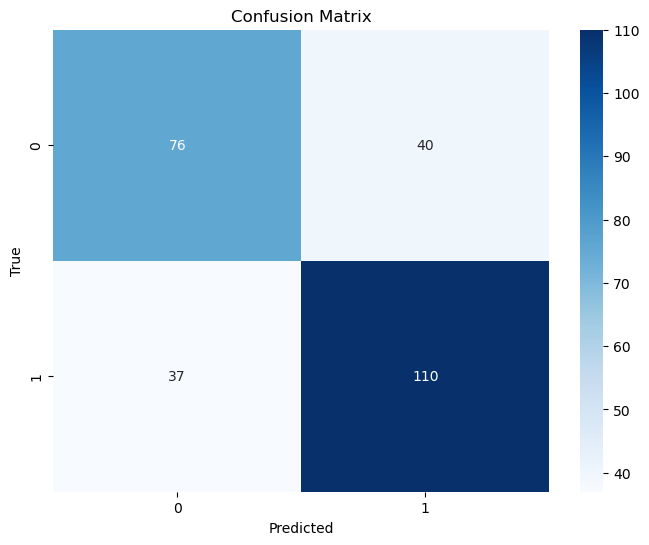

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve
Receiver Operating Characteristic (ROC) curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. It helps assess the trade-off between sensitivity and specificity.

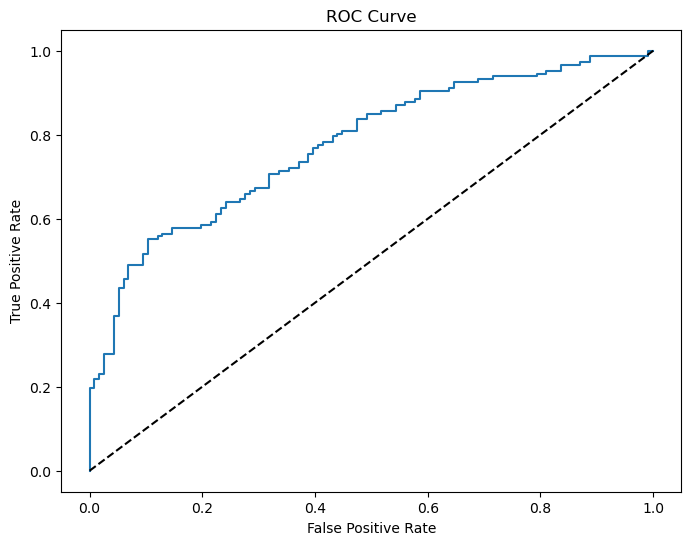

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Precision Recall Curve

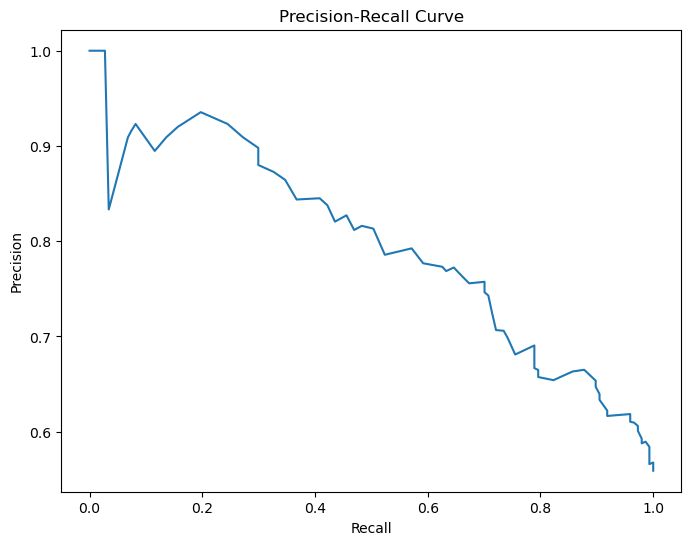

In [25]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Random Forest

In [53]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predict the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print (accuracy)
print (classification_rep)

0.6653992395437263
              precision    recall  f1-score   support

           0       0.64      0.55      0.59       116
           1       0.68      0.76      0.72       147

    accuracy                           0.67       263
   macro avg       0.66      0.65      0.65       263
weighted avg       0.66      0.67      0.66       263



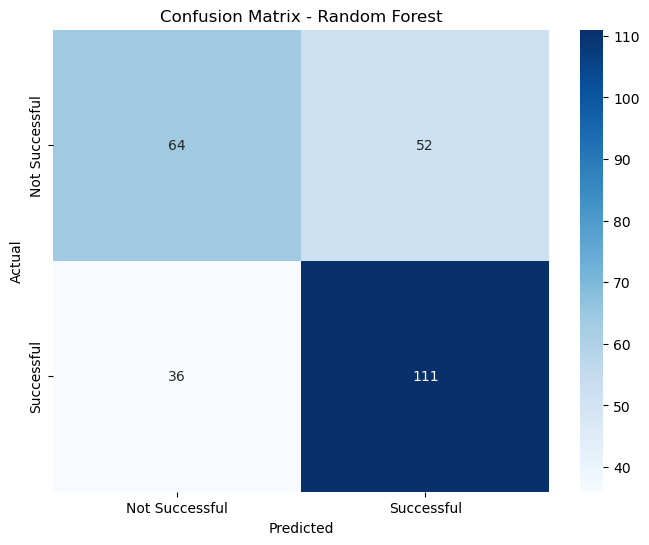

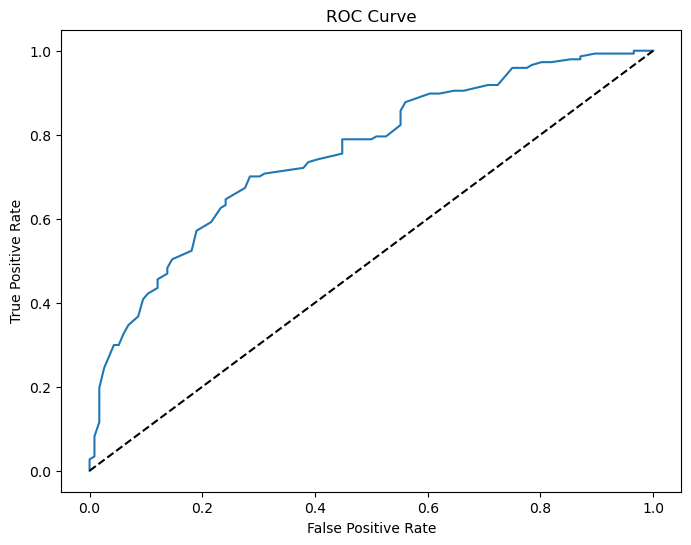

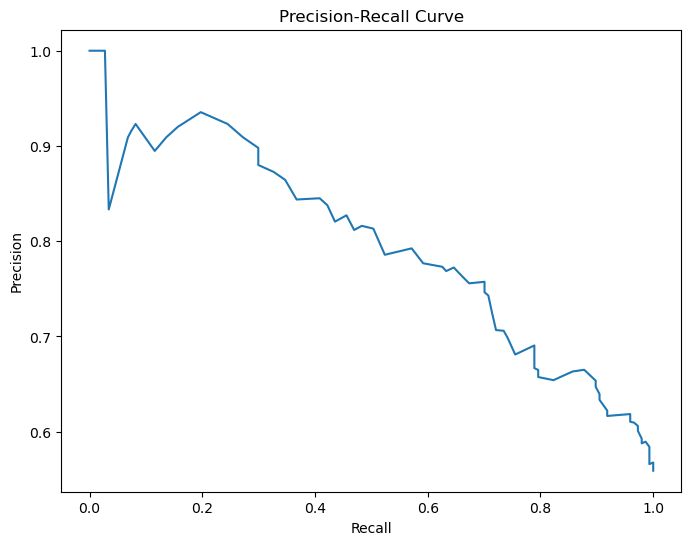

In [54]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Get predicted probabilities
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Decision Trees

In [32]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Predict the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model using accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(accuracy)
print(classification_rep)

0.623574144486692
              precision    recall  f1-score   support

           0       0.59      0.49      0.54       116
           1       0.64      0.73      0.68       147

    accuracy                           0.62       263
   macro avg       0.62      0.61      0.61       263
weighted avg       0.62      0.62      0.62       263



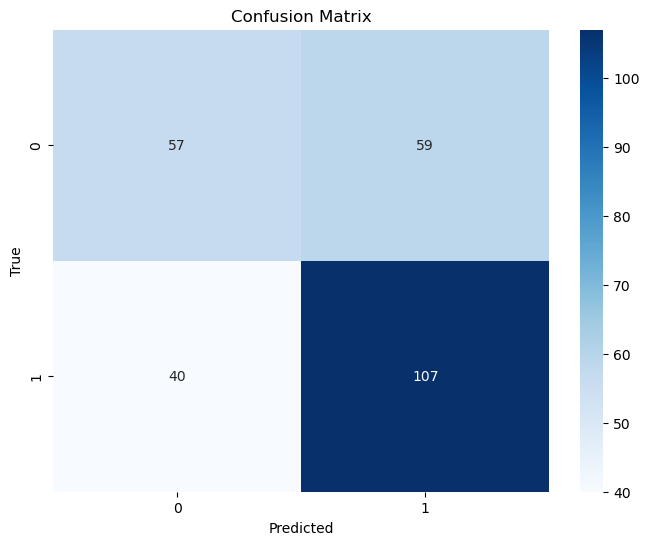

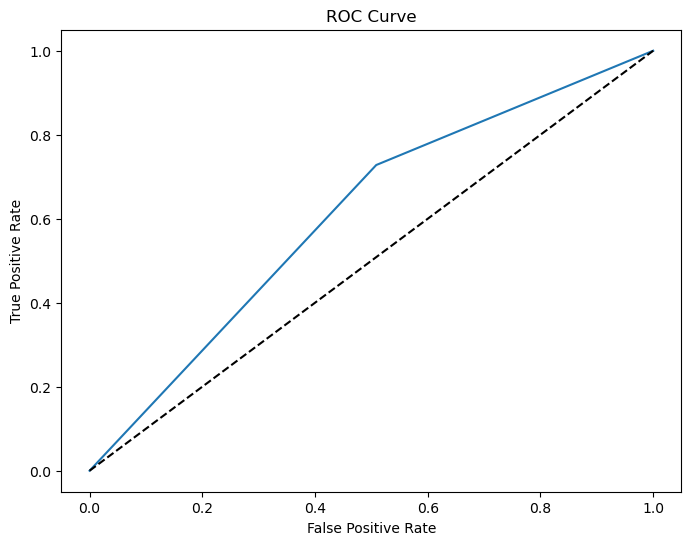

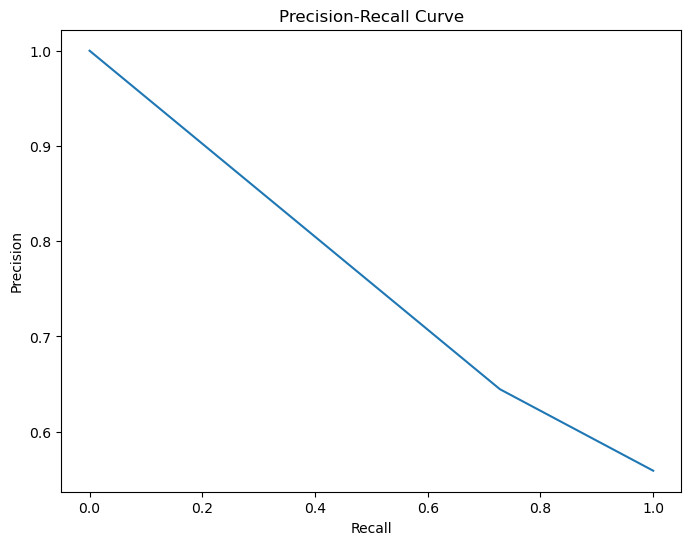

In [33]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#  Gradient Boosting Machines (GBM)

In [34]:
# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Predict the test set
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy and generate the classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6806083650190115
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.61      0.63       116
           1       0.71      0.73      0.72       147

    accuracy                           0.68       263
   macro avg       0.68      0.67      0.67       263
weighted avg       0.68      0.68      0.68       263



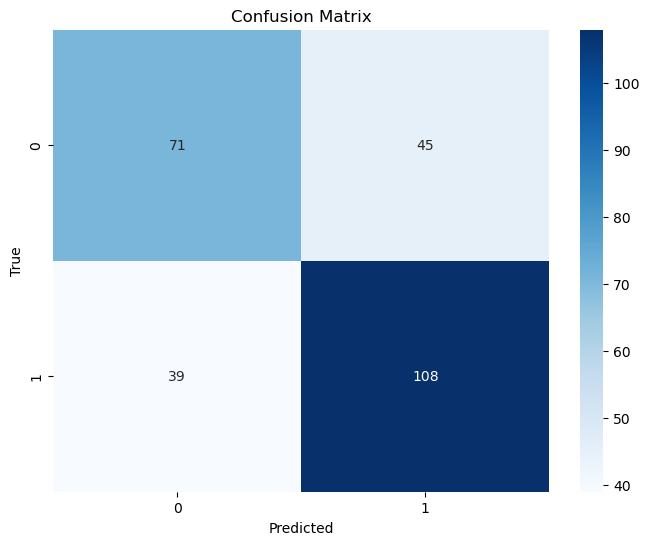

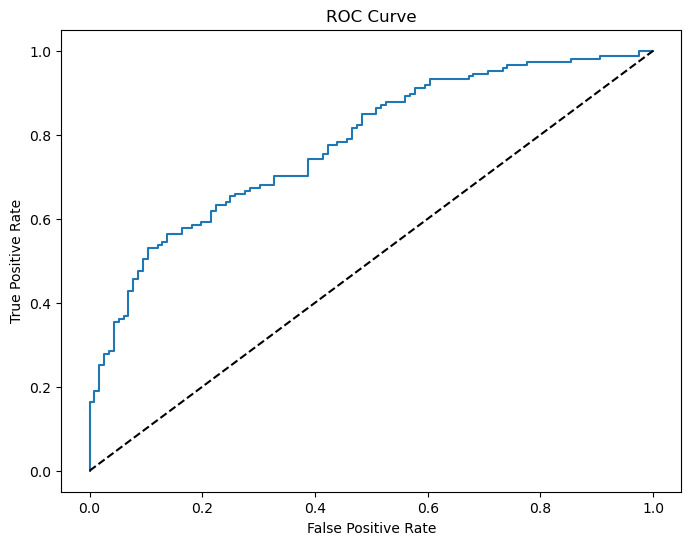

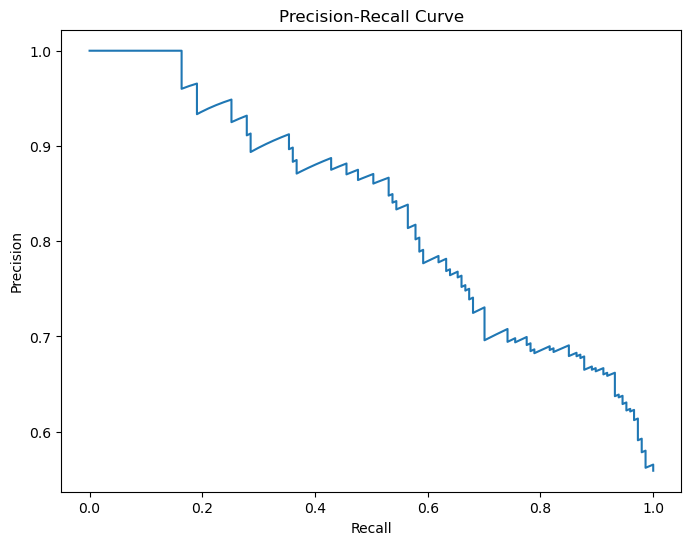

In [36]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities
y_pred_proba = gb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Artificial Neural Network Model

In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define the Artificial Neural Network (ANN) model
ann_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer with 64 units
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(32, activation='relu'),  # Another hidden layer with 32 units
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation (binary classification)
])

# Compile the model
ann_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the ANN model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Predict the test set
y_pred_prob = ann_model.predict(X_test)  # Get prediction probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the accuracy and generate the classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Epoch 1/10


/Users/sunjiayu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5545 - loss: 0.6789 - val_accuracy: 0.6098 - val_loss: 0.6571
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6034 - loss: 0.6526 - val_accuracy: 0.6504 - val_loss: 0.6346
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5838 - loss: 0.6185 - val_accuracy: 0.6667 - val_loss: 0.6217
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6548 - loss: 0.6110 - val_accuracy: 0.6992 - val_loss: 0.6097
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7118 - loss: 0.5886 - val_accuracy: 0.6829 - val_loss: 0.5992
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7183 - loss: 0.5612 - val_accuracy: 0.6992 - val_loss: 0.5869
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7058 - loss: 0.5537 - val_accuracy: 0.7073 - val_loss: 0.5757
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7538 - loss: 0.5093 - val_accuracy: 0.7073 - val_loss: 0.5682
Ep

In [45]:
!pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata


In [47]:
!pip install pydot graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 216.9 kB/s eta 0:00:00a 0:00:01


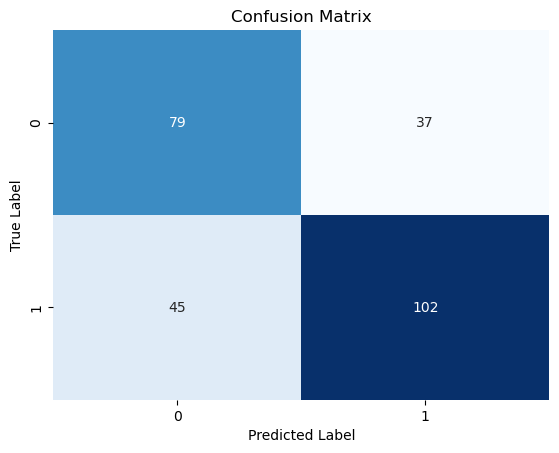

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


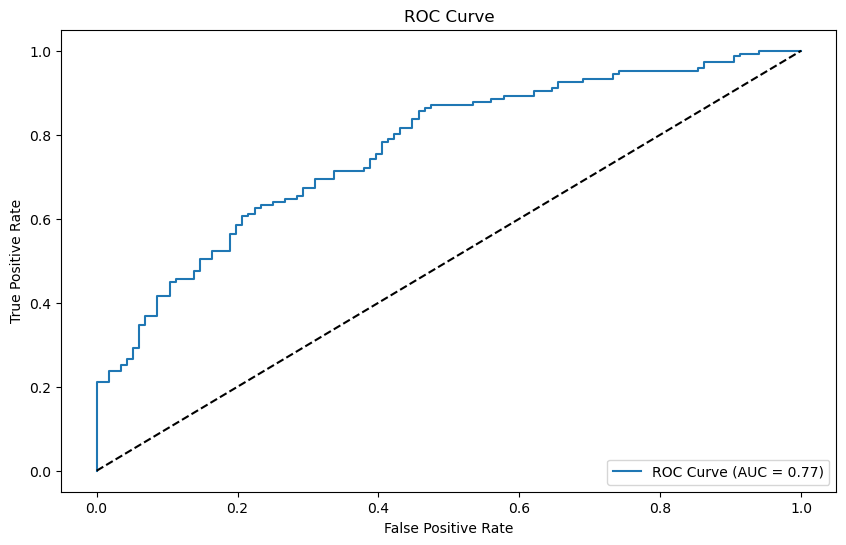

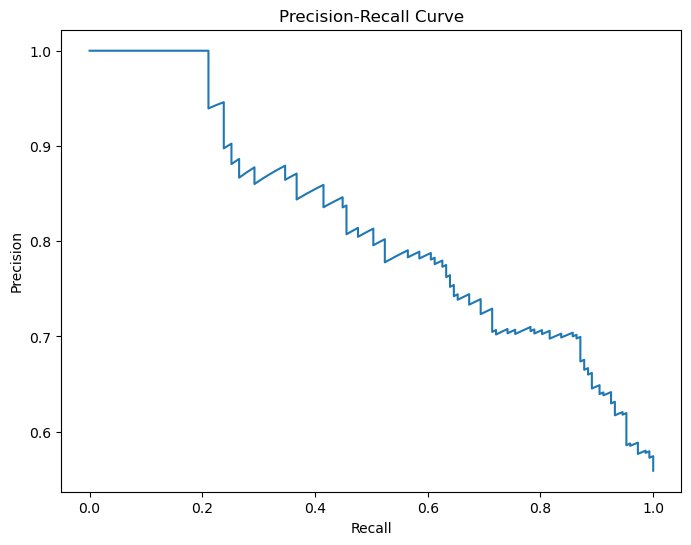

In [49]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#ROC Curve and AUC
y_pred_proba = ann_model.predict(X_test)  # Get prediction probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # False positive and true positive rates
auc = roc_auc_score(y_test, y_pred_proba)  # Calculate the AUC

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Convolutional Neural Network

In [50]:
# Install required libraries if you don't have them
!pip install tensorflow scikit-learn
import tensorflow as tf
from tensorflow import keras

# Define the Convolutional Neural Network (CNN) model
cnn_model = keras.Sequential([
    keras.layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),  # Convolutional layer
    keras.layers.MaxPooling1D(2),  # Max pooling layer
    keras.layers.Conv1D(64, 3, activation='relu'),  # Second convolutional layer
    keras.layers.MaxPooling1D(2),  # Second max pooling layer
    keras.layers.Flatten(),  # Flattening layer
    keras.layers.Dense(64, activation='relu'),  # Fully connected layer
    keras.layers.Dropout(0.2),  # Dropout layer for regularization
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Predict the test set
y_pred_prob = cnn_model.predict(X_test)  # Get prediction probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the accuracy and generate the classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Epoch 1/10


/Users/sunjiayu/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5619 - loss: 0.6822 - val_accuracy: 0.5854 - val_loss: 0.6735
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6446 - loss: 0.6601 - val_accuracy: 0.5854 - val_loss: 0.6610
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6613 - loss: 0.6166 - val_accuracy: 0.5528 - val_loss: 0.6903
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6807 - loss: 0.6044 - val_accuracy: 0.5854 - val_loss: 0.6740
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7102 - loss: 0.5575 - val_accuracy: 0.5854 - val_loss: 0.6933
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7572 - loss: 0.5055 - val_accuracy: 0.5691 - val_loss: 0.7106
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7416 - loss: 0.5218 - val_accuracy: 0.5366 - val_loss: 0.7273
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7869 - loss: 0.4664 - val_accuracy: 0.6016 - val_loss: 0.

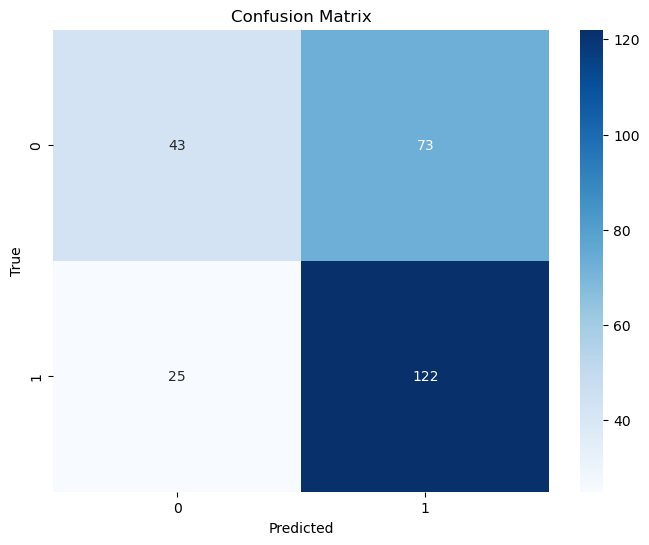

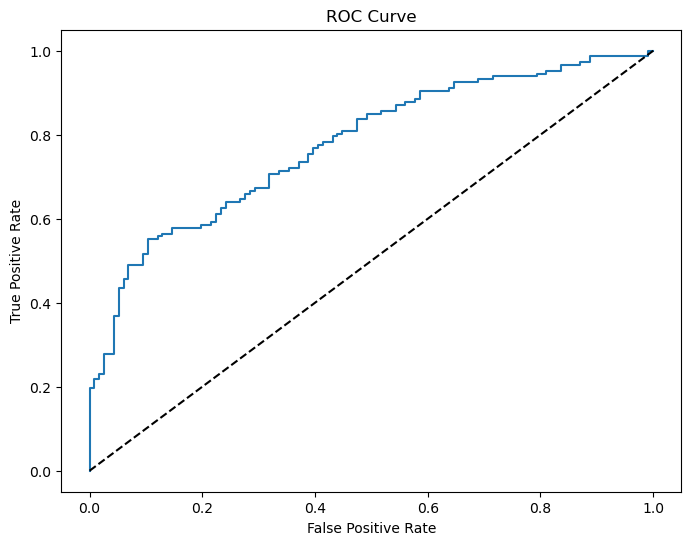

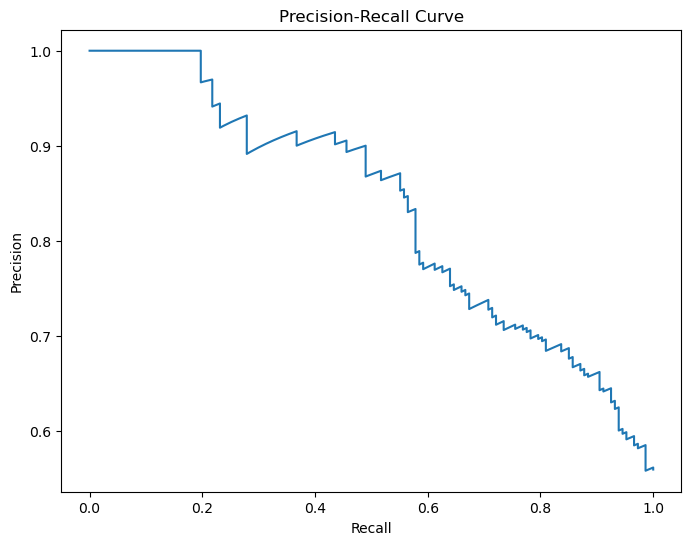

In [51]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Save model

In [31]:
# Install joblib
!pip install joblib
import joblib

# File paths for saving models
lf_model_path = "logistic_regression_model.pkl"
rf_model_path = "random_forest_model.pkl"
dt_model_path = "decision_tree_model.pkl"
gb_model_path = "gradient_boosting_model.pkl"
ann_model_path = "ann_model.h5"  # .h5 extension for HDF5 format
cnn_model_path = "cnn_model.h5" 

# Save Logistic Regression model
joblib.dump(log_reg_model, lf_model_path)

# Save Random Forest model
joblib.dump(rf_classifier, rf_model_path)

# Save Decision Tree model
joblib.dump(dt_classifier, dt_model_path)

# Save Gradient Boosting Machine model
joblib.dump(gb_classifier, gb_model_path)

# Save the ANN model
ann_model.save(ann_model_path)

# Save the CNN model
ann_model.save(cnn_model_path)

print("Models saved successfully!")

Models saved successfully!
